In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
plt.style.use('seaborn')

In [5]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


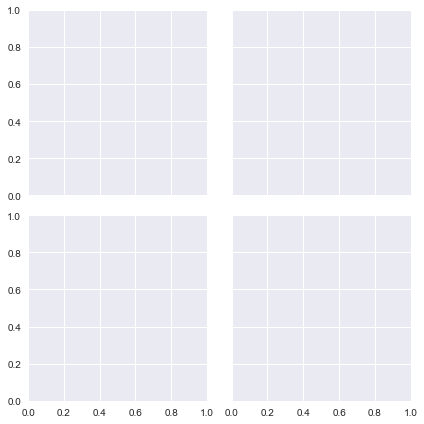

In [11]:
sns.FacetGrid(tips, row='sex', col='time')

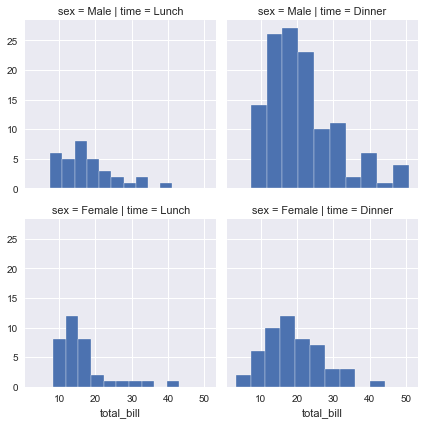

In [12]:
g = sns.FacetGrid(tips, row='sex', col='time')
g.map(plt.hist, 'total_bill')

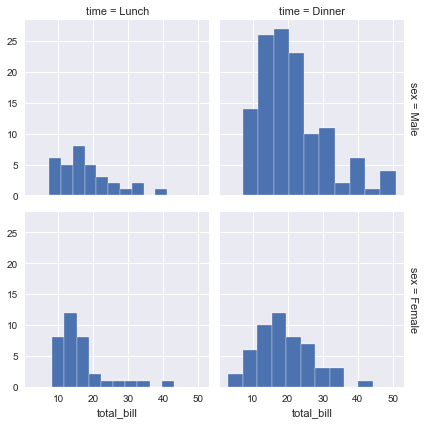

In [15]:
g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
g.map(plt.hist, 'total_bill')

In [17]:
bins = np.linspace(0, 60, 13)
bins

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.])

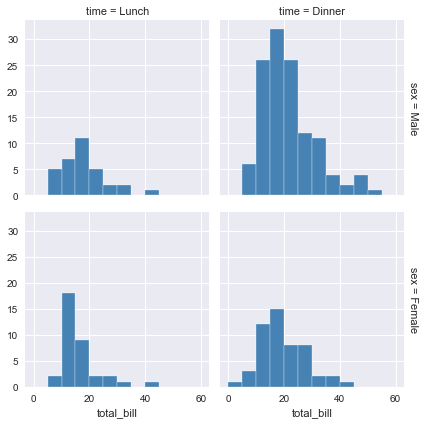

In [18]:
g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
g.map(plt.hist, 'total_bill', color='steelblue', bins=bins)

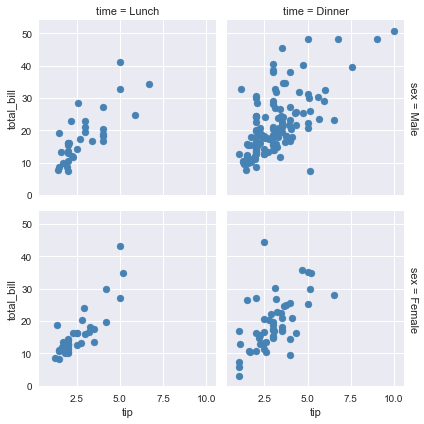

In [19]:
g = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
g.map(plt.scatter, 'tip', 'total_bill', color='steelblue')

수치형 vs 수치형 일때는 scatterplot으로 그려서 본다.

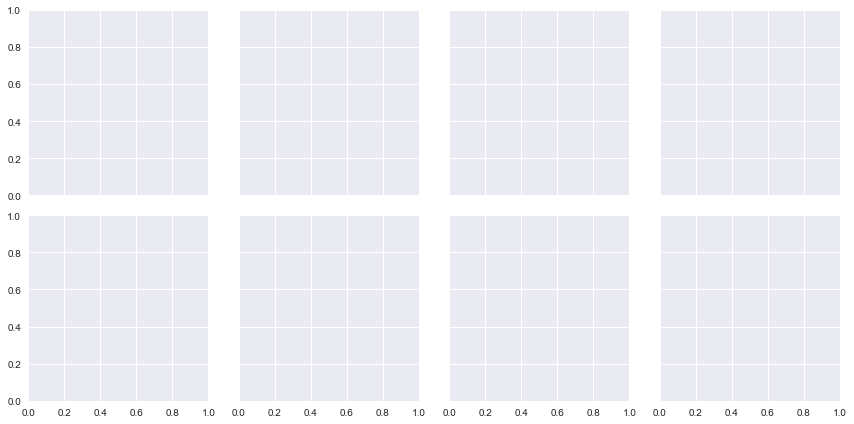

In [20]:
sns.FacetGrid(tips, row='time', col='day')

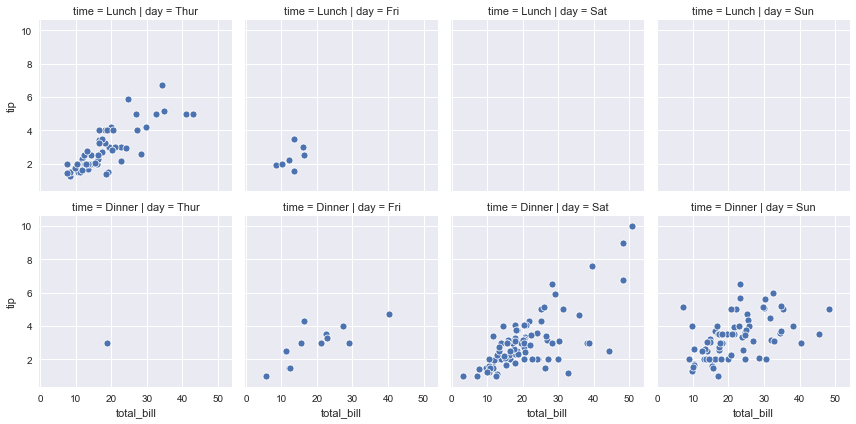

In [21]:
g = sns.FacetGrid(tips, row='time', col='day')
g.map(sns.scatterplot, 'total_bill', 'tip')

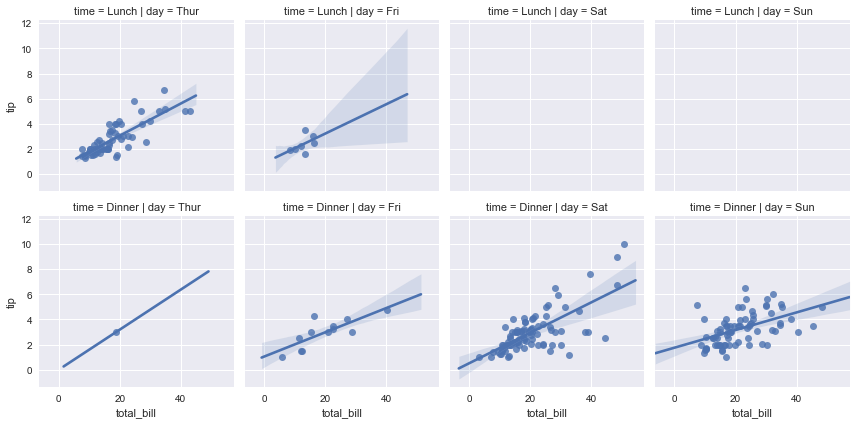

In [22]:
g = sns.FacetGrid(tips, row='time', col='day')
g.map(sns.regplot, 'total_bill', 'tip')

범주형 vs 수치형 일때는 barplot으로 확인한다.

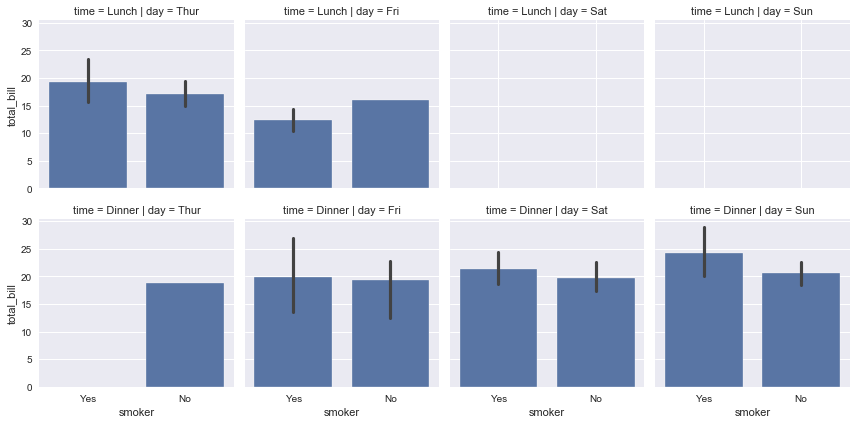

In [23]:
g = sns.FacetGrid(tips, row='time', col='day')
g.map(sns.barplot, 'smoker', 'total_bill')

범주형 데이터의 산점도를 확인할때는 swarmplot을 사용한다.

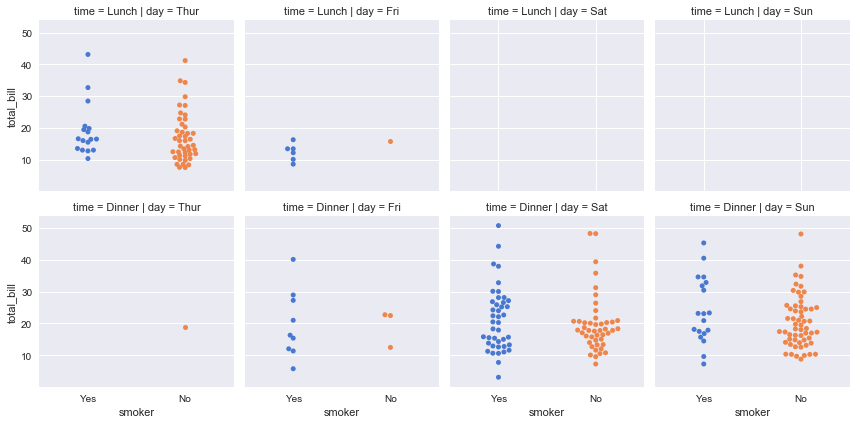

In [25]:
g = sns.FacetGrid(tips, row='time', col='day')
g.map(sns.swarmplot, 'smoker', 'total_bill', palette='muted')

이상치를 확인하는데 boxplot을 사용한다.

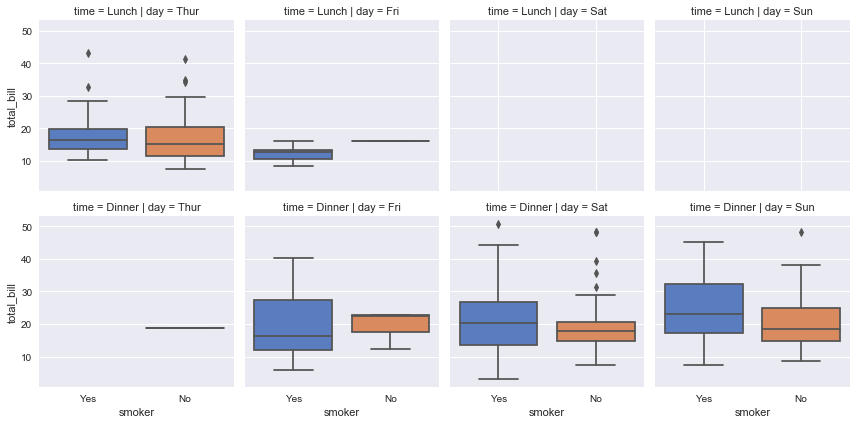

In [26]:
g = sns.FacetGrid(tips, row='time', col='day')
g.map(sns.boxplot, 'smoker', 'total_bill', palette='muted')

전체적인 분포를 보려고 할때 쓴다.(distribution을 확인할 수 있다.)

boxplot의 단점을 보완한 것이 violinplot이다. 네모안이 어느정도의 빈도로 구성되 있는지를 보여준다.

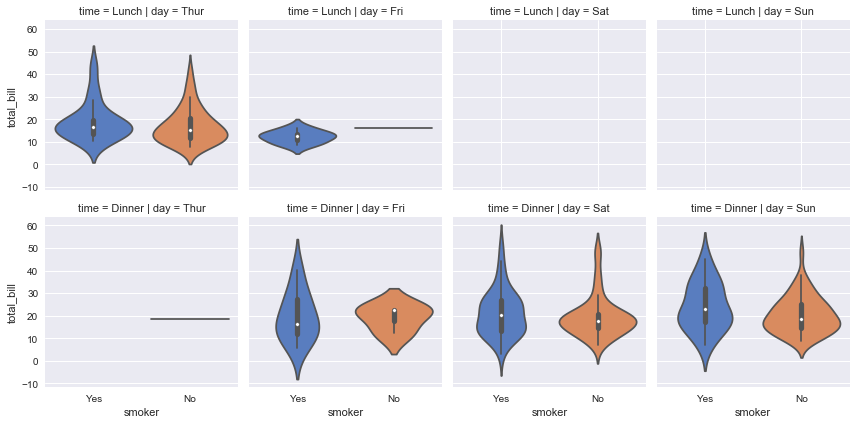

In [27]:
g = sns.FacetGrid(tips, row='time', col='day')
g.map(sns.violinplot, 'smoker', 'total_bill', palette='muted')

pivot_tabel에는 aggfunc가 mean으로 되어 있어서 기본적으로 평균값을 출력한다. count로 바꾸면 갯수를 출력한다.

In [28]:
tips.pivot_table(index='time', columns='day')

size                                     tip                      \
day         Thur       Fri       Sat       Sun      Thur       Fri       Sat   
time                                                                           
Lunch   2.459016  2.000000       NaN       NaN  2.767705  2.382857       NaN   
Dinner  2.000000  2.166667  2.517241  2.842105  3.000000  2.940000  2.993103   

                 total_bill                               
day          Sun       Thur        Fri        Sat    Sun  
time                                                      
Lunch        NaN  17.664754  12.845714        NaN    NaN  
Dinner  3.255132  18.780000  19.663333  20.441379  21.41

In [30]:
tips.pivot_table(index='time', columns='day', values='total_bill', aggfunc='count')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61.0,7.0,NaN,NaN
Dinner,1.0,12.0,87.0,76.0


범주형 데이터를 갯수를 세어주는 것이 crosstab이다.

In [33]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [31]:
pd.crosstab(tips['time'], tips['day'])

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


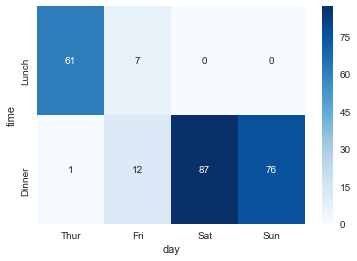

In [43]:
c = pd.crosstab(tips['time'], tips['day'])

sns.heatmap(c, annot=True, cmap='Blues')

normalize를 True로 하면 비율로 표시된다.

In [32]:
pd.crosstab(tips['time'], tips['day'], normalize=True)

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,0.250000,0.028689,0.000000,0.000000
Dinner,0.004098,0.049180,0.356557,0.311475


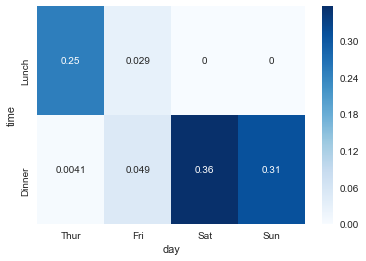

In [40]:
n = pd.crosstab(tips['time'], tips['day'], normalize=True)

sns.heatmap(n, annot=True, cmap='Blues')

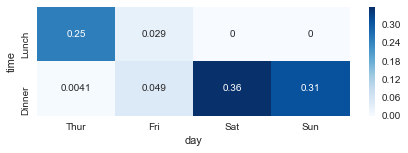

In [41]:
n = pd.crosstab(tips['time'], tips['day'], normalize=True)

plt.figure(figsize=(7,2))
sns.heatmap(n, annot=True, cmap='Blues')